### Student Information
#### Name:張宜婷
#### Student ID:106062585

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def tokenize_text(text, remove_stopwords=False):
    """ Tokenize text using the nltk library """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

### Data Preparation 

In [3]:
dataset_name = ['yelp', 'imdb', 'amazon_cells']

In [4]:
path_name = 'sentiment labelled sentences/'
df = {}
for name in dataset_name:
    txt_name = path_name + name + '_labelled.txt'
    df[name] = pd.read_csv(txt_name, delimiter='\t', names=['text', 'label'])    

##### data size

In [5]:
for name in dataset_name:
      print('len of dataset', name, ':', len(df[name]))

len of dataset yelp : 1000
len of dataset imdb : 748
len of dataset amazon_cells : 1000


##### dataset overview

In [6]:
for name in dataset_name:
    print('\ndataset', name)
    print(df[name][:5])


dataset yelp
                                                text  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

dataset imdb
                                                text  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

dataset amazon_cells
                                                text  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbon

In [7]:
for name in dataset_name:
    print('\ndataset', name, 'text')
    print(df[name]['text'][:5])


dataset yelp text
0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: text, dtype: object

dataset imdb text
0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: text, dtype: object

dataset amazon_cells text
0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: text, dtype: object


In [8]:
for name in dataset_name:
    print('\ndataset', name, 'label')
    print(df[name]['label'][:5])


dataset yelp label
0    1
1    0
2    0
3    1
4    1
Name: label, dtype: int64

dataset imdb label
0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

dataset amazon_cells label
0    0
1    1
2    1
3    0
4    1
Name: label, dtype: int64


#### last 10 records 

In [9]:
for name in dataset_name:
    print('\ndataset', name)
    print(df[name][-11:-1])


dataset yelp
                                                  text  label
989  I would avoid this place if you are staying in...      0
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0

dataset imdb
                                                  text  label
737  :) Anyway, the plot flowed smoothly and the ma...      1
738  The opening sequence of this gem is a classic,...      1
739             Fans of the genre will be in heaven.        1
740                Lange had become a grea

In [10]:
for name in dataset_name:
    print('\ndataset', name)
    print(df[name].iloc[::10, :][0:10])


dataset yelp
                                                 text  label
0                            Wow... Loved this place.      1
10                           Service was very prompt.      1
20                                The Burrittos Blah!      0
30  Also there are combos like a burger, fries, an...      1
40                       The shrimp tender and moist.      1
50  We ordered the duck rare and it was pink and t...      1
60  At least think to refill my water before I str...      0
70  The deal included 5 tastings and 2 drinks, and...      1
80  Coming here is like experiencing an underwhelm...      0
90  In summary, this was a largely disappointing d...      0

dataset imdb
                                                 text  label
0   A very, very, very slow-moving, aimless movie ...      0
10               And those baby owls were adorable.        1
20  This if the first movie I've given a 10 to in ...      1
30                      The problem was the script.      

###### Exercise 0: Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

#### missing value amount

In [11]:
for name in dataset_name:
    print(name, ':', sum(df[name].text.isnull()))

yelp : 0
imdb : 0
amazon_cells : 0


####  duplicated amount

In [12]:
for name in dataset_name:
    print(name, ':', sum(df[name].text.duplicated()))

yelp : 4
imdb : 3
amazon_cells : 10


#### show duplicated data

In [13]:
for name in dataset_name:
    print('\ndataset', name)
    dataset = df[name]
    print(dataset[dataset.text.duplicated()])


dataset yelp
                                  text  label
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0

dataset imdb
                                 text  label
165  Definitely worth checking out.        1
387                Not recommended.        0
590                           10/10        1

dataset amazon_cells
                                                  text  label
285                                      Great phone!.      1
407                                       Works great.      1
524                                      Works great!.      1
543                            Don't buy this product.      0
744  If you like a loud buzzing to override all you...      0
748                                      Does not fit.      0
778                              This is a great deal.      1
792                                       Gr

In [14]:
for name in dataset_name:
    print('\ndataset:', name, '(text, times)')
    dataset = df[name]
    duplicated_text = dataset[dataset.text.duplicated()]
    duplicated_text = list(duplicated_text['text'])
    for text in duplicated_text:
        print(text, sum(dataset['text']==text))


dataset: yelp (text, times)
I love this place. 2
The food was terrible. 2
I won't be back. 2
I would not recommend this place. 2

dataset: imdb (text, times)
Definitely worth checking out.   2
Not recommended.   2
10/10   2

dataset: amazon_cells (text, times)
Great phone!. 2
Works great. 2
Works great!. 2
Don't buy this product. 2
If you like a loud buzzing to override all your conversations, then this phone is for you! 2
Does not fit. 2
This is a great deal. 2
Great Phone. 2
Excellent product for the price. 2
Great phone. 2


In [15]:
for name in dataset_name:
    print('\ndataset:', name)
    print('original data size:', len(df[name]))
    df[name].drop_duplicates(keep=False, inplace=True)
    print('data size after drop duplicates:', len(df[name]))


dataset: yelp
original data size: 1000
data size after drop duplicates: 992

dataset: imdb
original data size: 748
data size after drop duplicates: 742

dataset: amazon_cells
original data size: 1000
data size after drop duplicates: 980


#### Date preprocessing

In [16]:
df_sample = df['yelp'].sample(n=500)
len(df_sample)

500

In [17]:
df_sample[0:4]

,text,label
592,OMG I felt like I had never eaten Thai food un...,1
210,If that bug never showed up I would have given...,0
24,So they performed.,1
59,"The ripped banana was not only ripped, but pet...",0


In [18]:
data = [go.Histogram(x = np.array(df_sample.label), xbins = dict(size = 0.2))]
layout = go.Layout(title = 'yelp Sampled Results',
                   xaxis = dict(title = 'Value'),
                   yaxis = dict(title = 'Count', range=[220, 280]),
                   bargap = 0.5,
                   bargroupgap = 0.5)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = '')

##### Exercise 2: We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts. 

In [19]:
trace1 = go.Histogram(x = np.array(df[dataset_name[0]].label),
                      histnorm = 'count',
                      name = 'yelp',
                      marker = dict(color = '#39cc6e'),
                      opacity = 0.75)
trace2 = go.Histogram(x = np.array(df[dataset_name[1]].label),
                      name = 'imdb',
                      marker = dict(color = '#69db9e'),
                      opacity = 0.75)
trace3 = go.Histogram(x = np.array(df[dataset_name[2]].label),
                      name = 'amazon',
                      marker = dict(color = '#8ef2cf'),
                      opacity = 0.75)
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'labels distribution',
                   xaxis = dict(title = 'Value'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.3,
                   bargroupgap = 0.5)
fig = go.Figure(data = data, layout=layout)
py.iplot(fig, filename = 'styled histogram')

##### plot with matplotlib

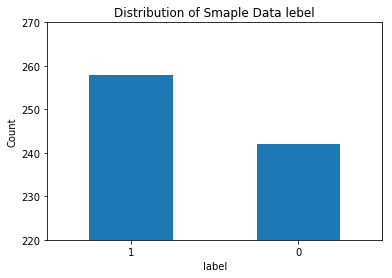

In [20]:
df_sample.label.value_counts().plot(kind="bar", rot=0)
plt.xlabel('label')
plt.ylabel('Count')
plt.ylim([220, 270])
plt.title('Distribution of Smaple Data lebel')
plt.show()

In [21]:
df['unigrams'] = df['text'].apply(lambda x: tokenize_text(x))
df[0:10]["unigrams"]

KeyError: 'text'

In [ ]:
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df.text)
    
    analyze = count_vect.build_analyzer()
    print(analyze(" ".join(list(df[4:5].text))))
    
    print(" ".join(list(df[4:5].text)))
    
    print('shape of this matrix:', df_counts.shape)
    
    print('the feature names of the vectorizer\n', count_vect.get_feature_names()[0:10])